In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#matplotlib inline
sns.set_color_codes()

In [3]:
nom_reg='Lag'


In [8]:
damiani_tab1_file = "J_A+A_604_A135_table2.dat.fits"
tab = Table.read(damiani_tab1_file)
tab
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,271.110700,-24.332642,-6.258445,13.711606,56980.737850,-3.934894,11.655811,10499.992090,-3.204393,11.567137,2044.263891,-2.989252,11.512982,1639.080833
std,0.164268,0.105422,2.742485,1.677870,56029.717118,3.240030,1.140301,10622.170782,3.345863,1.205795,1687.371379,3.328345,1.229661,1718.881796
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,3.990000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010500,-24.406500,-8.460000,13.160000,24079.470000,-5.950000,10.870000,5686.930000,-5.440000,10.730000,1197.130000,-5.260000,10.620000,889.610000
50%,271.110600,-24.344670,-6.370000,13.550000,41640.680000,-3.950000,11.530000,8211.000000,-3.190000,11.450000,1622.020000,-2.980000,11.380000,1223.920000
75%,271.211600,-24.256500,-4.450000,14.030000,69764.840000,-1.900000,12.310000,11584.220000,-1.180000,12.250000,2273.270000,-0.960000,12.230000,1750.890000
max,271.606600,-24.054330,2.840000,64.590000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


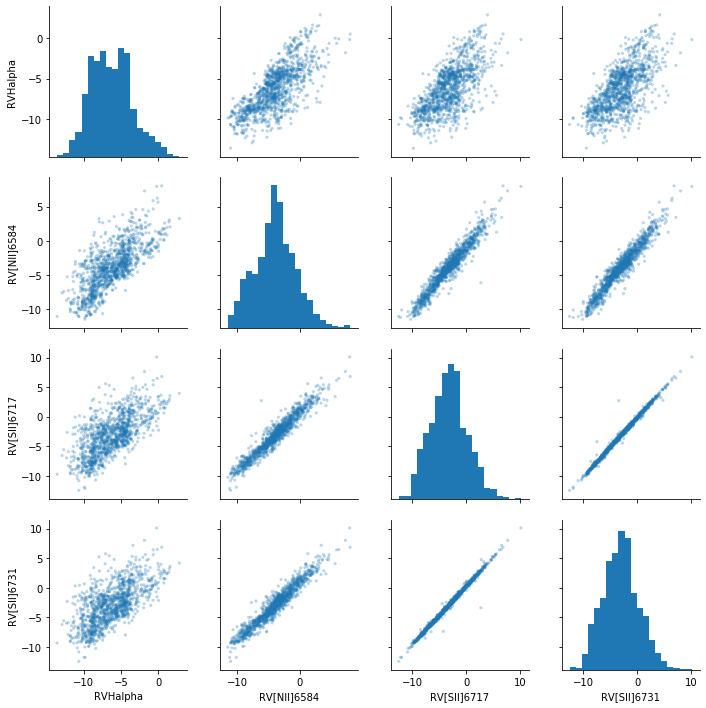

In [5]:
sns.pairplot(df,
             vars=["RVHalpha", "RV[NII]6584", "RV[SII]6717", "RV[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [10]:
m=df['sigHalpha'] < df['sigHalpha'].mean()+4*df['sigHalpha'].std()


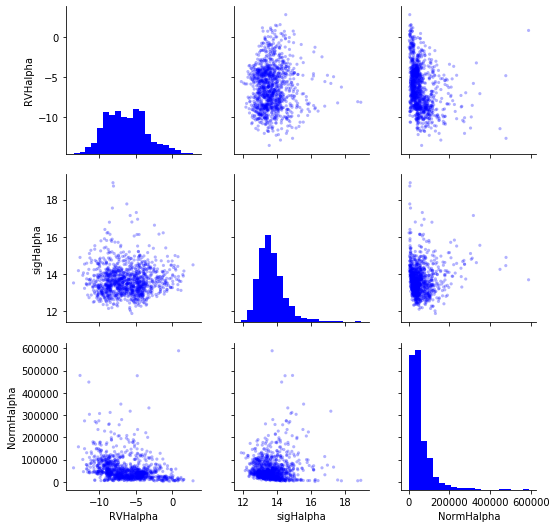

In [11]:
sns.pairplot(df[m],
             vars=["RVHalpha", "sigHalpha", "NormHalpha"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="blue"),
             diag_kws=dict(bins=20, color="blue"),
            )

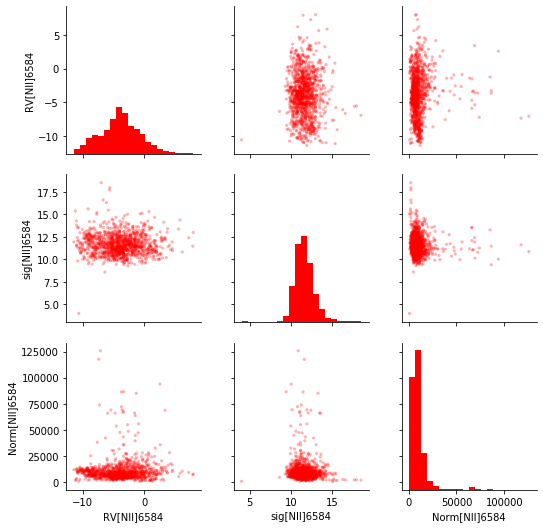

In [7]:
sns.pairplot(df,
             vars=["RV[NII]6584", "sig[NII]6584", "Norm[NII]6584"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="red"),
             diag_kws=dict(bins=20, color="red"),
            )

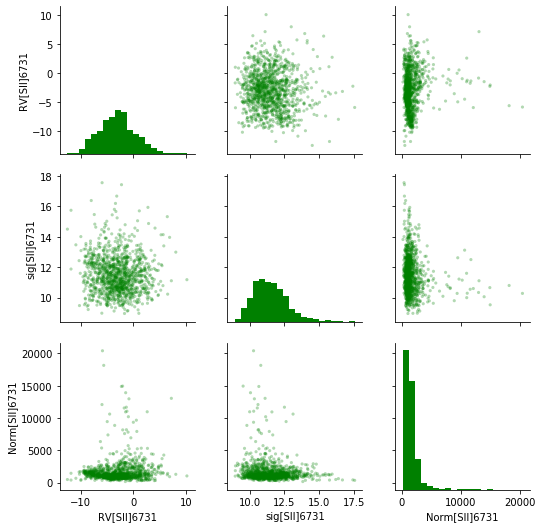

In [9]:
sns.pairplot(df,
             vars=["RV[SII]6731", "sig[SII]6731", "Norm[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="green"),
             diag_kws=dict(bins=20, color="green"),
            )

In [15]:
df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1}
)


df1.describe()



,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-6.258445,1.0
std,0.164268,0.105422,2.742485,0.0
min,270.544500,-24.566860,-13.550000,1.0
25%,271.010500,-24.406500,-8.460000,1.0
50%,271.110600,-24.344670,-6.370000,1.0
75%,271.211600,-24.256500,-4.450000,1.0
max,271.606600,-24.054330,2.840000,1.0


In [16]:
df2 = df1.copy()

In [18]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -4.44  271.0562 -24.10769 -4.44
  1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75

In [19]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/home/zalenovo/my_project_dir/my_project_env/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]


In [76]:
pairs.head()


RA        DE     V       RA_       DE_    V_      dDE         dRA  \
0 1   271.0562 -24.10769 -2.19  271.0348 -24.18544 -3.58  279.900   70.299156   
  2   271.0562 -24.10769 -2.19  271.0433 -24.22119  2.84  408.600   42.370665   
  16  271.0562 -24.10769 -2.19  270.9704 -24.33131  1.59  805.032  281.692552   
  17  271.0562 -24.10769 -2.19  271.0009 -24.28103  6.85  624.024  181.592905   
  18  271.0562 -24.10769 -2.19  270.9405 -24.30600 -2.19  713.916  379.895870   

               s     log_s    dV      dV2   log_dV2  VV_mean s_class  
0 1   288.593107  2.460286  1.39   1.9321  0.286030   -2.885       5  
  2   410.790985  2.613621 -5.03  25.3009  1.403136    0.325       5  
  16  852.893437  2.930895 -3.78  14.2884  1.154984   -0.300       6  
  17  649.909175  2.812853 -9.04  81.7216  1.912337    2.330       6  
  18  808.700765  2.907788  0.00   0.0000      -inf   -2.190       6

In [77]:

pairs.describe()


,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,3.535290e+05,353529.000000
mean,271.216232,-24.271510,-2.671022,271.037176,-24.393673,-3.247067,439.786929,587.380240,806.749818,2.826790,0.576045,20.160767,-inf,-2.959045
std,0.135293,0.091345,2.900745,0.124940,0.083749,3.580847,321.957036,457.630555,447.955980,0.291108,4.452976,27.439392,NaN,2.379316
min,270.549500,-24.565560,-12.480000,270.544500,-24.566860,-12.480000,0.072000,0.327562,1.900494,0.278866,-18.130000,0.000000,-inf,-12.140000
25%,271.121100,-24.342220,-4.480000,270.965000,-24.445610,-6.020000,176.184000,230.741807,473.240329,2.675082,-2.380000,2.190400,3.405234e-01,-4.670000
50%,271.208200,-24.273560,-2.820000,271.038300,-24.392530,-3.350000,378.612000,487.709394,746.096234,2.872795,0.750000,9.734400,9.883092e-01,-3.020000
75%,271.296500,-24.196610,-1.030000,271.117400,-24.345530,-0.950000,644.508000,840.539280,1067.359168,3.028311,3.690000,27.144100,1.433675e+00,-1.370000
max,271.606600,-24.054330,10.120000,271.577800,-24.063610,10.120000,1819.980000,3454.002676,3461.323373,3.539242,19.200000,368.640000,2.566602e+00,9.070000


In [78]:

pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.174242,0.290836,0.427712,0.075379,-0.038686,0.107379,0.586876,0.527546,0.467031,0.220565,0.037758,0.041874,0.148175
DE,0.174242,1.000000,0.229370,0.024728,0.481016,0.077765,0.570938,0.147525,0.403255,0.399793,0.086880,-0.028136,-0.003496,0.198336
V,0.290836,0.229370,1.000000,0.045518,0.092525,0.067766,0.147630,0.241442,0.285485,0.240606,0.596923,0.152799,0.120455,0.660569
RA_,0.427712,0.024728,0.045518,1.000000,-0.025089,-0.084544,0.048751,-0.480865,-0.388696,-0.317500,0.097636,-0.092059,-0.061106,-0.035872
DE_,0.075379,0.481016,0.092525,-0.025089,1.000000,0.207604,-0.445144,0.096276,-0.123775,-0.150053,-0.106672,-0.006915,-0.005876,0.212622
V_,-0.038686,0.077765,0.067766,-0.084544,0.207604,1.000000,-0.114981,0.038298,-0.028291,-0.016956,-0.760003,0.051184,-0.006718,0.793804
dDE,0.107379,0.570938,0.147630,0.048751,-0.445144,-0.114981,1.000000,0.060522,0.527786,0.548859,0.188631,-0.022262,0.001932,0.003469
dRA,0.586876,0.147525,0.241442,-0.480865,0.096276,0.038298,0.060522,1.000000,0.859923,0.737402,0.126483,0.119081,0.095346,0.175996
s,0.527546,0.403255,0.285485,-0.388696,-0.123775,-0.028291,0.527786,0.859923,1.000000,0.906709,0.208720,0.090883,0.079515,0.152736
log_s,0.467031,0.399793,0.240606,-0.317500,-0.150053,-0.016956,0.548859,0.737402,0.906709,1.000000,0.170370,0.100820,0.108660,0.133908


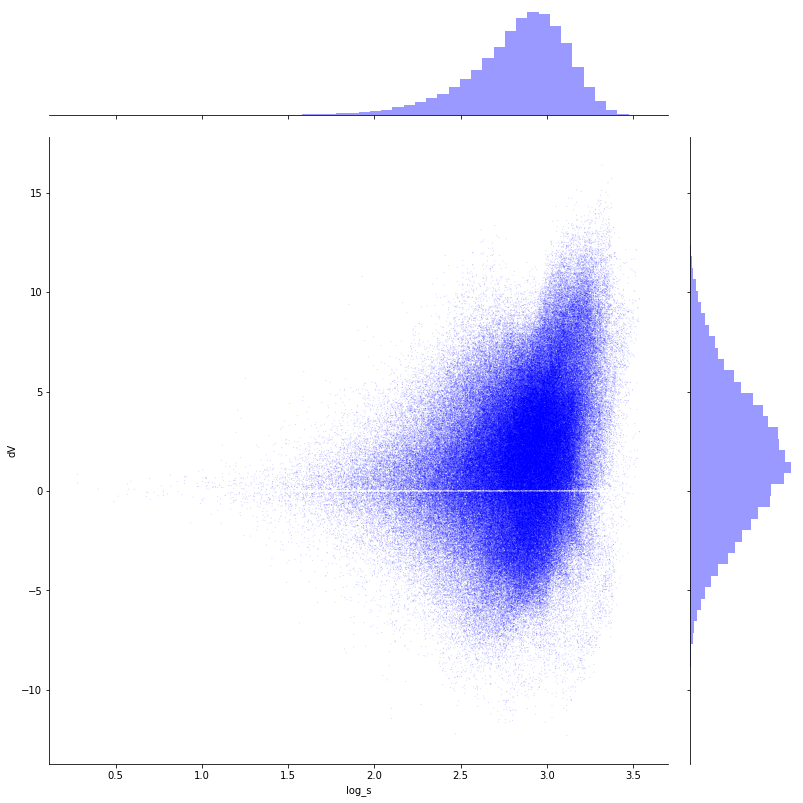

In [33]:

mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

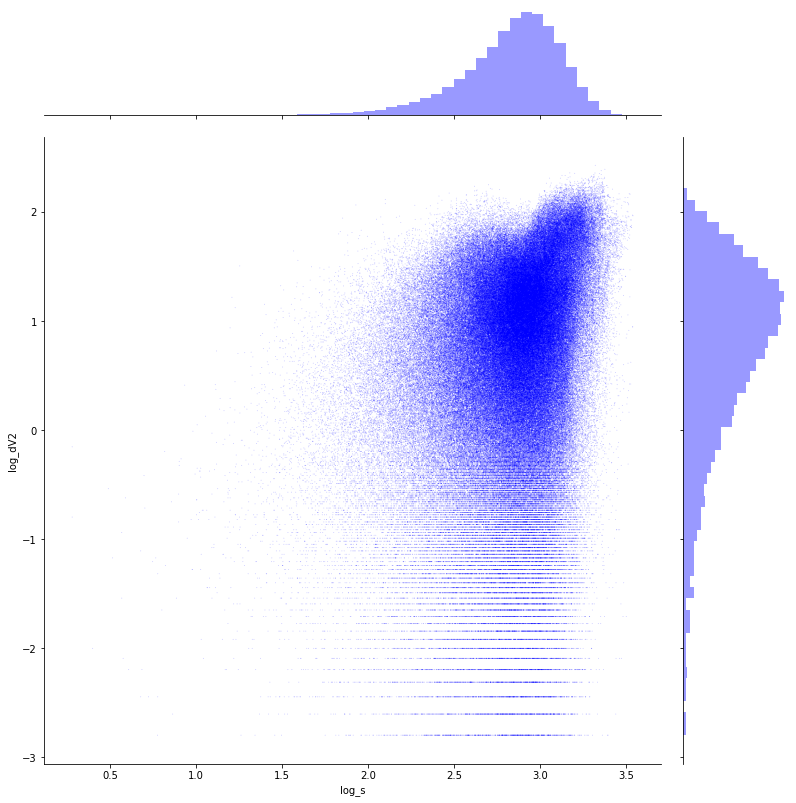

In [34]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [24]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [25]:
pairs.s_class[pairs.s_class == 0] = 1

In [26]:

for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  17.000000  17.000000
mean    0.139200   0.574487
std     0.185588   0.144444
min     0.003600   0.278866
25%     0.008100   0.513640
50%     0.067600   0.588373
75%     0.193600   0.684262
max     0.705600   0.746366

s_class = 2
              dV2       log_s
count  133.000000  133.000000
mean     0.741796    1.101771
std      2.077859    0.124207
min      0.000000    0.764528
25%      0.048400    1.025487
50%      0.176400    1.137724
75%      0.462400    1.196895
max     16.564900    1.247424

s_class = 3
               dV2        log_s
count  1448.000000  1448.000000
mean      1.861442     1.595528
std       3.759166     0.122404
min       0.000000     1.251207
25%       0.100825     1.515272
50%       0.532900     1.624635
75%       1.883775     1.694547
max     

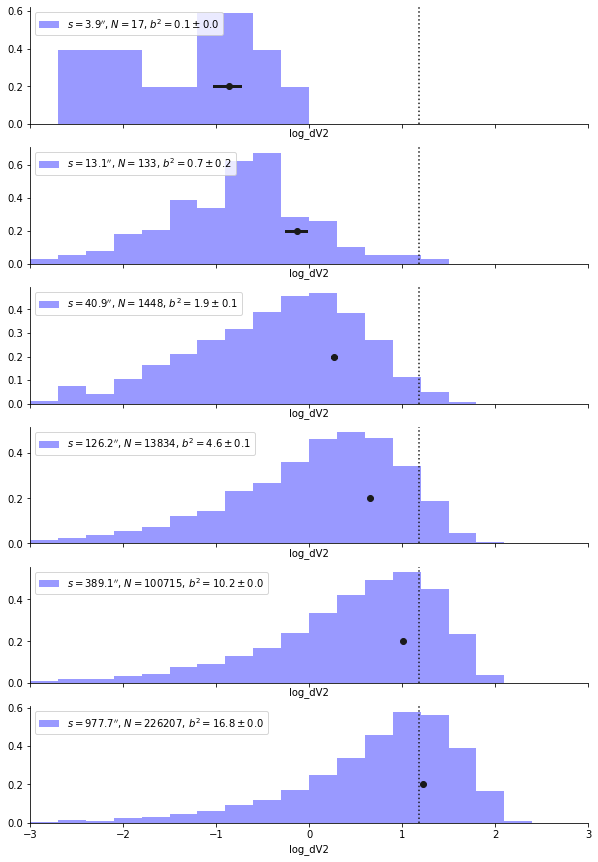

In [35]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [28]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 15.03


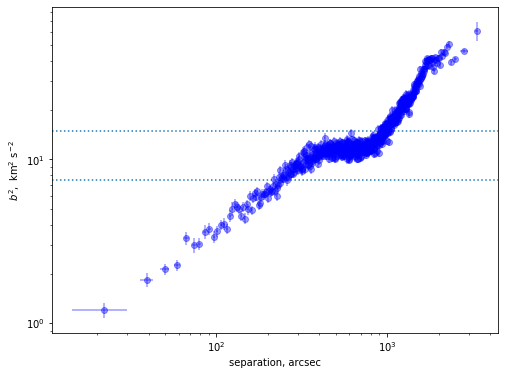

In [36]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [79]:
#Modifications on RA and De

In [106]:
#De

In [107]:


df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1}
)


df1.describe()



,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-6.258445,1.0
std,0.164268,0.105422,2.742485,0.0
min,270.544500,-24.566860,-13.550000,1.0
25%,271.010500,-24.406500,-8.460000,1.0
50%,271.110600,-24.344670,-6.370000,1.0
75%,271.211600,-24.256500,-4.450000,1.0
max,271.606600,-24.054330,2.840000,1.0


In [81]:
df2 = df1.copy()

In [82]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -4.44  271.0562 -24.10769 -4.44
  1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75

In [84]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

In [85]:
pairs = pairs[(pairs.dDE > 0.0) ]


In [87]:
pairs.head()

RA        DE     V       RA_       DE_    V_      dDE         dRA  \
0 1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67  279.900   70.299156   
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41  408.600   42.370665   
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78  442.728 -338.295852   
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75   18.000 -301.649434   
  5  271.0562 -24.10769 -4.44  271.1266 -24.19394 -7.91  310.500 -231.256821   

              s     log_s    dV      dV2   log_dV2  VV_mean  
0 1  288.593107  2.460286  4.23  17.8929  1.252681   -6.555  
  2  410.790985  2.613621 -2.03   4.1209  0.614992   -3.425  
  3  557.182345  2.745997  3.34  11.1556  1.047493   -6.110  
  4  302.186004  2.480274  1.31   1.7161  0.234543   -5.095  
  5  387.156257  2.587886  3.47  12.0409  1.080659   -6.175

In [88]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,691942.000000,6.919420e+05,691942.000000
mean,271.111206,-24.272563,-6.148577,271.110195,-24.392726,-6.368018,432.585990,3.311468,810.421525,2.826328,0.219441,15.044553,-inf,-6.258298
std,0.179815,0.090350,2.691176,0.146939,0.082628,2.786272,317.800452,762.187355,460.743495,0.294626,3.872521,20.694277,NaN,1.937464
min,270.544500,-24.565560,-13.550000,270.544500,-24.566860,-13.550000,0.072000,-3486.289521,0.791245,-0.101689,-14.990000,0.000000,-inf,-13.215000
25%,271.005300,-24.344670,-8.140000,271.015000,-24.445640,-8.630000,172.800000,-475.362192,469.198886,2.671357,-2.500000,1.512900,1.798102e-01,-7.630000
50%,271.115100,-24.274030,-6.460000,271.108700,-24.392640,-6.320000,371.808000,20.002553,741.025222,2.869833,0.180000,7.075600,8.497633e-01,-6.350000
75%,271.224200,-24.198170,-4.490000,271.195600,-24.344670,-4.430000,633.762000,500.103783,1070.348174,3.029525,2.810000,20.160100,1.304493e+00,-4.960000
max,271.606600,-24.054330,2.840000,271.606600,-24.061310,2.840000,1845.108000,3454.002676,3486.292858,3.542364,16.390000,268.632100,2.429158e+00,2.215000


In [89]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.001637,0.500917,-0.000961,-0.000544,-0.000378,0.002184,0.774606,-0.061948,-0.025314,0.348380,0.143613,0.084217,0.347620
DE,0.001637,1.000000,0.115790,0.005121,0.482056,0.010085,0.572264,-0.001958,0.407123,0.403418,0.073211,-0.012521,-0.003271,0.087668
V,0.500917,0.115790,1.000000,-0.000310,0.047651,0.000622,0.073906,0.387916,0.156308,0.146395,0.694494,0.226260,0.132175,0.694957
RA_,-0.000961,0.005121,-0.000310,1.000000,0.021419,0.464529,-0.014807,-0.633188,-0.019055,-0.006879,-0.334443,0.064529,0.042946,0.333806
DE_,-0.000544,0.482056,0.047651,0.021419,1.000000,0.013853,-0.442633,-0.013947,-0.106174,-0.138586,0.023147,-0.024132,-0.029638,0.043055
V_,-0.000378,0.010085,0.000622,0.464529,0.013853,1.000000,-0.002645,-0.294052,0.124121,0.110064,-0.719066,0.021744,0.040794,0.719483
dDE,0.002184,0.572264,0.073906,-0.014807,-0.442633,-0.002645,1.000000,0.011051,0.516058,0.542603,0.053264,0.009773,0.024394,0.049427
dRA,0.774606,-0.001958,0.387916,-0.633188,-0.013947,-0.294052,0.011051,1.000000,-0.035908,-0.015251,0.481149,0.070371,0.038049,0.057972
s,-0.061948,0.407123,0.156308,-0.019055,-0.106174,0.124121,0.516058,-0.035908,1.000000,0.904383,0.019320,0.251998,0.167554,0.197807
log_s,-0.025314,0.403418,0.146395,-0.006879,-0.138586,0.110064,0.542603,-0.015251,0.904383,1.000000,0.022545,0.213880,0.175908,0.180814


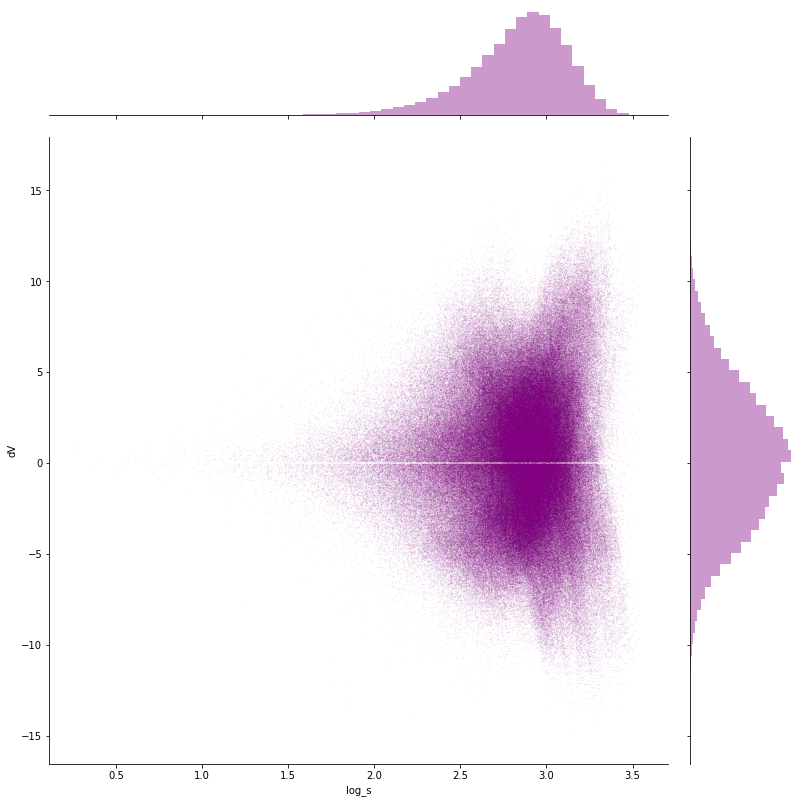

In [101]:

mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="purple")
ax.fig.set_size_inches(12, 12)

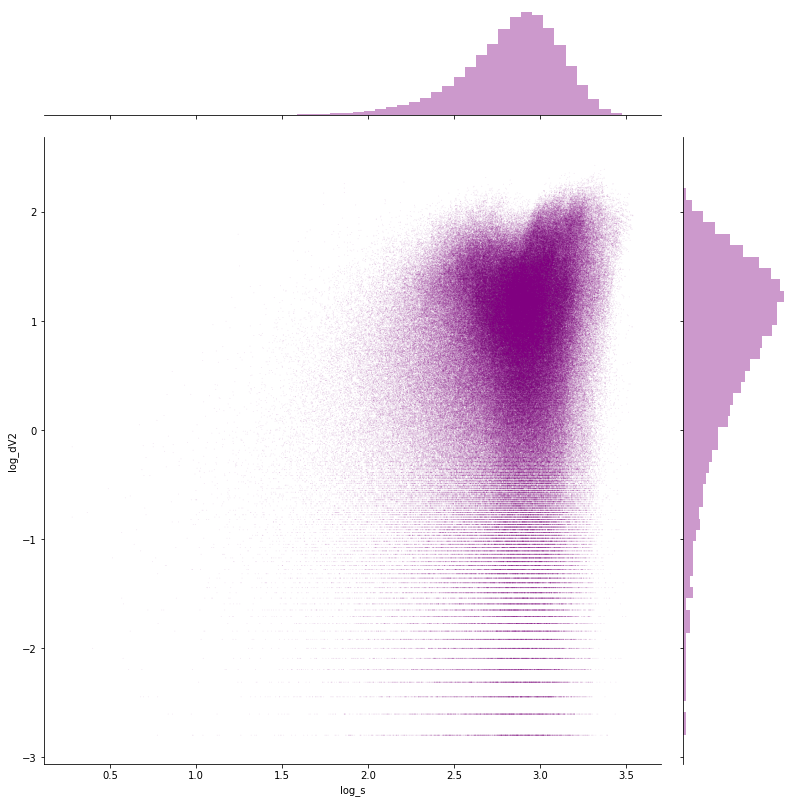

In [102]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="purple")
ax.fig.set_size_inches(12, 12)

In [95]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [96]:
pairs.s_class[pairs.s_class == 0] = 1

In [97]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  32.000000  32.000000
mean    0.209328   0.585685
std     0.261272   0.177326
min     0.003600  -0.101689
25%     0.020475   0.566719
50%     0.119050   0.646686
75%     0.260400   0.694367
max     1.123600   0.746366

s_class = 2
              dV2       log_s
count  284.000000  284.000000
mean     0.972192    1.097368
std      4.080299    0.126371
min      0.000000    0.750564
25%      0.047325    1.024696
50%      0.230400    1.127141
75%      0.660175    1.196767
max     62.726400    1.249197

s_class = 3
               dV2        log_s
count  2922.000000  2922.000000
mean      2.232442     1.590801
std       5.773339     0.124605
min       0.000000     1.251197
25%       0.115600     1.509366
50%       0.608400     1.622316
75%       2.190400     1.693431
max     

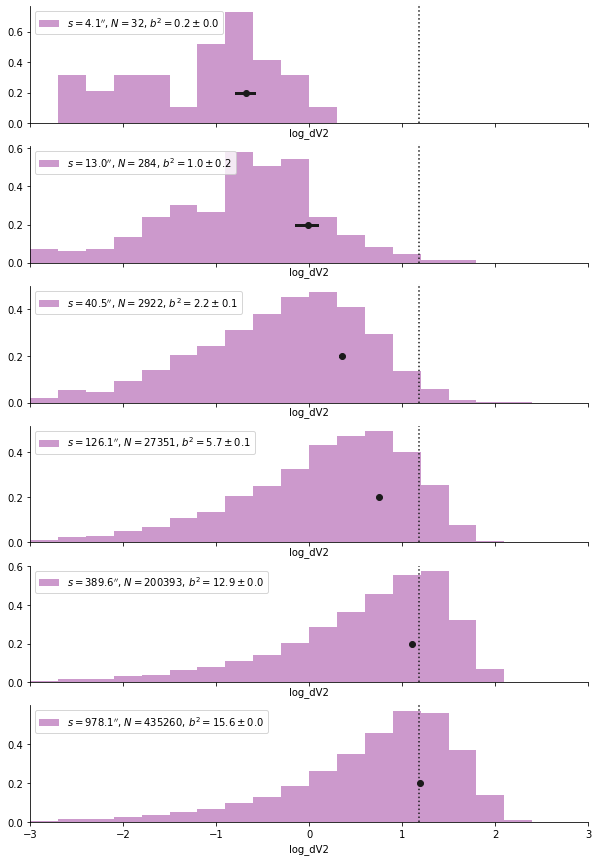

In [103]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, color="purple",hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [104]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 15.03


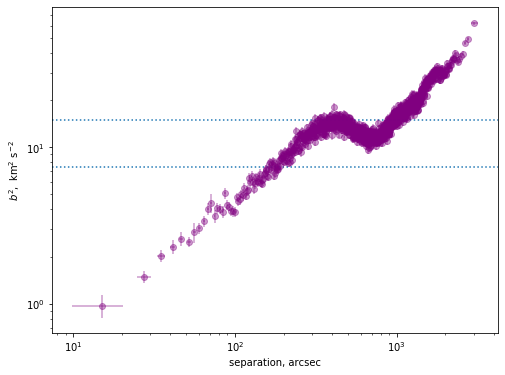

In [105]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4, color="purple")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [108]:
#RA

In [126]:
df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1}
)


df1.describe()

,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-6.258445,1.0
std,0.164268,0.105422,2.742485,0.0
min,270.544500,-24.566860,-13.550000,1.0
25%,271.010500,-24.406500,-8.460000,1.0
50%,271.110600,-24.344670,-6.370000,1.0
75%,271.211600,-24.256500,-4.450000,1.0
max,271.606600,-24.054330,2.840000,1.0


In [127]:
df2 = df1.copy()

In [128]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -4.44  271.0562 -24.10769 -4.44
  1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75

In [129]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

In [130]:
pairs = pairs[(pairs.dRA > 0.0)]

In [131]:
pairs.head()

RA        DE     V       RA_       DE_    V_      dDE         dRA  \
0 1   271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67  279.900   70.299156   
  2   271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41  408.600   42.370665   
  16  271.0562 -24.10769 -4.44  270.9704 -24.33131 -4.73  805.032  281.692552   
  17  271.0562 -24.10769 -4.44  271.0009 -24.28103  0.48  624.024  181.592905   
  18  271.0562 -24.10769 -4.44  270.9405 -24.30600 -9.93  713.916  379.895870   

               s     log_s    dV      dV2   log_dV2  VV_mean  
0 1   288.593107  2.460286  4.23  17.8929  1.252681   -6.555  
  2   410.790985  2.613621 -2.03   4.1209  0.614992   -3.425  
  16  852.893437  2.930895  0.29   0.0841 -1.075204   -4.585  
  17  649.909175  2.812853 -4.92  24.2064  1.383930   -1.980  
  18  808.700765  2.907788  5.49  30.1401  1.479145   -7.185

In [132]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,691864.000000,6.918640e+05,691864.000000
mean,271.201692,-24.330298,-5.549616,271.019705,-24.334989,-6.966907,16.888086,596.997859,810.465143,2.826369,1.417291,15.044616,-inf,-6.258262
std,0.132734,0.105441,2.777546,0.140539,0.105266,2.512075,536.494811,473.941217,460.743342,0.294576,3.610529,20.694120,NaN,1.937436
min,270.549500,-24.566860,-13.550000,270.544500,-24.566860,-13.550000,-1845.108000,0.327532,0.791245,-0.101689,-14.410000,0.000000,-inf,-13.215000
25%,271.110600,-24.406500,-7.590000,270.947900,-24.406500,-8.850000,-355.176000,228.818193,469.246779,2.671401,-0.970000,1.512900,1.798102e-01,-7.630000
50%,271.191400,-24.341110,-5.550000,271.027500,-24.347170,-7.270000,14.994000,488.326946,741.071180,2.869860,1.420000,7.075600,8.497633e-01,-6.350000
75%,271.290800,-24.256500,-3.970000,271.110600,-24.256500,-5.020000,388.377000,853.005449,1070.380147,3.029538,3.880000,20.160100,1.304493e+00,-4.960000
max,271.606600,-24.054330,2.840000,271.596500,-24.054330,2.840000,1819.980000,3486.289521,3486.292858,3.542364,16.390000,268.632100,2.429158e+00,2.215000


In [133]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.165425,0.646447,0.442377,-0.032280,0.099970,0.139845,0.488476,0.422249,0.384665,0.427749,0.289668,0.180827,0.528190
DE,0.165425,1.000000,0.092306,0.059171,-0.000450,0.018283,0.707854,0.094963,0.134403,0.127300,0.058290,0.012170,-0.005048,0.078019
V,0.646447,0.092306,1.000000,0.243820,-0.005358,0.070897,0.069095,0.356767,0.335697,0.293292,0.719963,0.422907,0.299839,0.762772
RA_,0.442377,0.059171,0.243820,1.000000,-0.161885,0.185317,0.156214,-0.566462,-0.497970,-0.402871,0.058631,-0.022245,-0.018083,0.294913
DE_,-0.032280,-0.000450,-0.005358,-0.161885,1.000000,0.053575,-0.706677,0.128374,0.131461,0.109954,-0.041397,-0.041872,-0.021041,0.030892
V_,0.099970,0.018283,0.070897,0.185317,0.053575,1.000000,-0.024907,-0.088438,-0.066045,-0.045334,-0.641223,-0.201057,-0.144637,0.699119
dDE,0.139845,0.707854,0.069095,0.156214,-0.706677,-0.024907,1.000000,-0.023489,0.002237,0.012402,0.070483,0.038188,0.011290,0.033380
dRA,0.488476,0.094963,0.356767,-0.566462,0.128374,-0.088438,-0.023489,1.000000,0.872538,0.745426,0.335990,0.287767,0.183725,0.198400
s,0.422249,0.134403,0.335697,-0.497970,0.131461,-0.066045,0.002237,0.872538,1.000000,0.904437,0.304201,0.252015,0.167543,0.197814
log_s,0.384665,0.127300,0.293292,-0.402871,0.109954,-0.045334,0.012402,0.745426,0.904437,1.000000,0.257168,0.213905,0.175870,0.180844


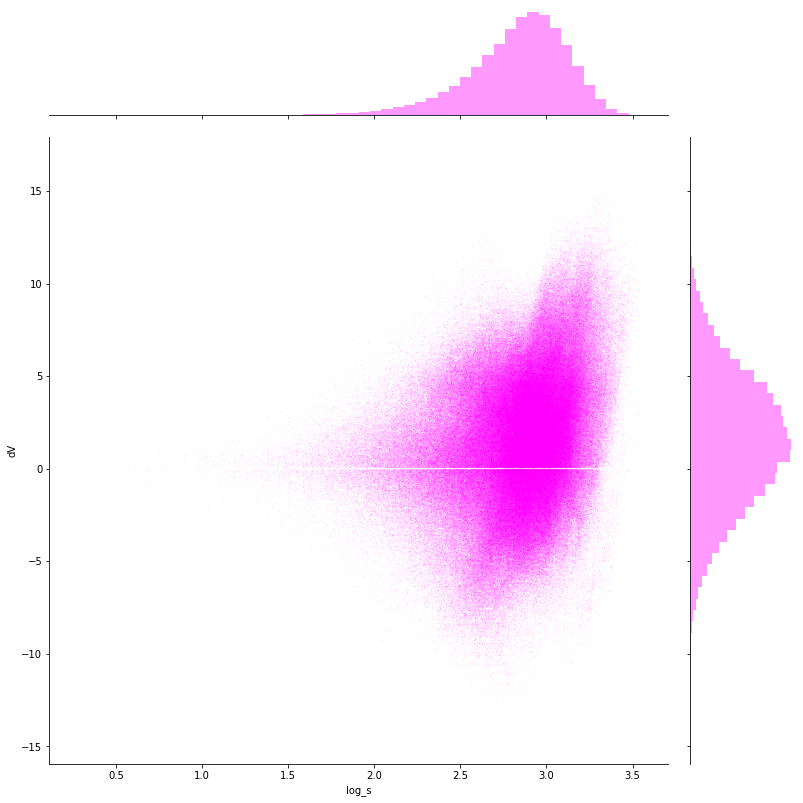

In [134]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="magenta")

ax.fig.set_size_inches(12, 12)

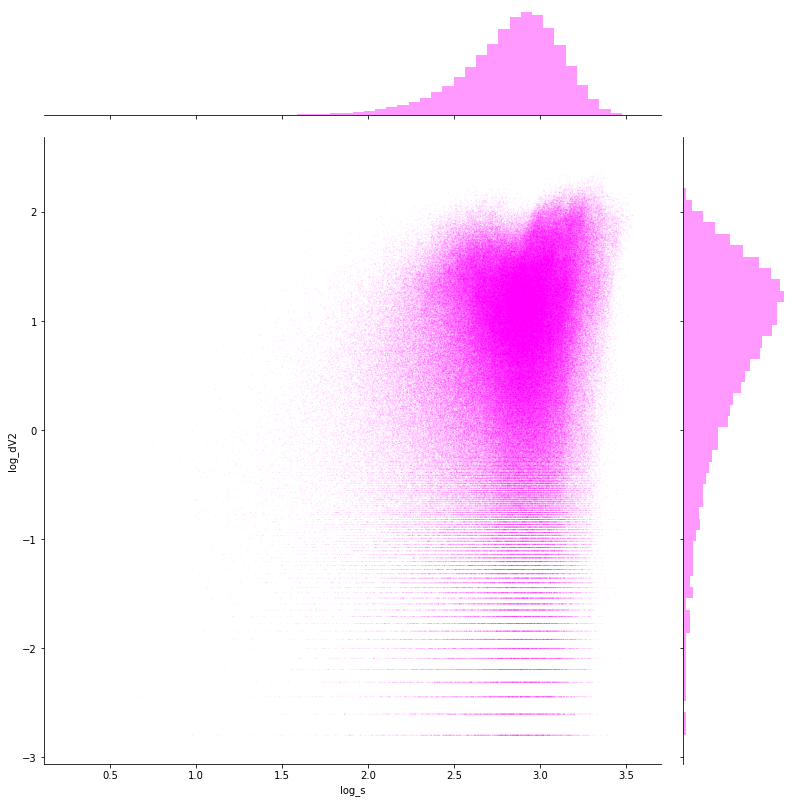

In [135]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="magenta")
ax.fig.set_size_inches(12, 12)

In [136]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [137]:
pairs.s_class[pairs.s_class == 0] = 1

In [138]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  32.000000  32.000000
mean    0.209328   0.585685
std     0.261272   0.177326
min     0.003600  -0.101689
25%     0.020475   0.566719
50%     0.119050   0.646686
75%     0.260400   0.694367
max     1.123600   0.746366

s_class = 2
              dV2       log_s
count  282.000000  282.000000
mean     0.978865    1.098131
std      4.094019    0.125596
min      0.000000    0.750564
25%      0.049525    1.025487
50%      0.230400    1.127141
75%      0.668325    1.196852
max     62.726400    1.249197

s_class = 3
               dV2        log_s
count  2915.000000  2915.000000
mean      2.231999     1.590929
std       5.779599     0.124629
min       0.000000     1.251197
25%       0.115600     1.509560
50%       0.608400     1.622504
75%       2.190400     1.693443
max     

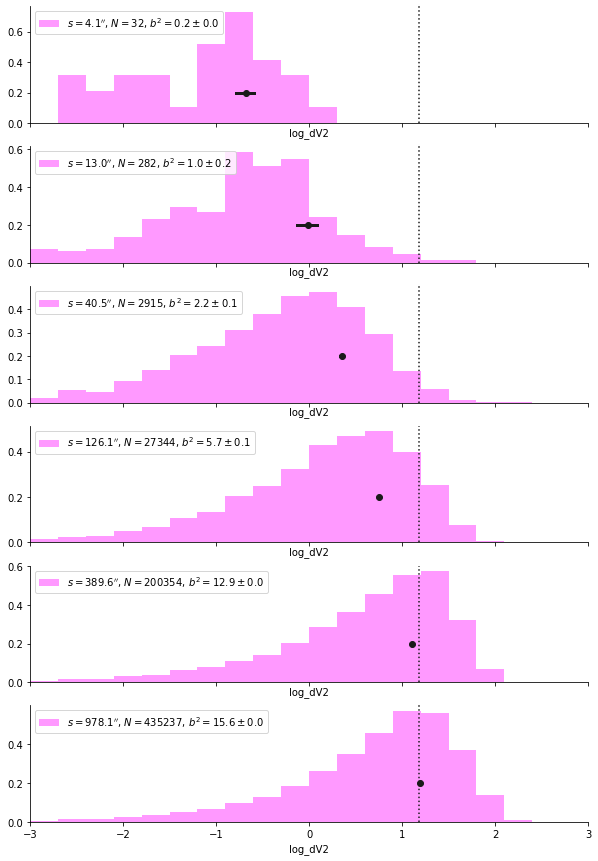

In [140]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="magenta", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()



In [141]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 15.03


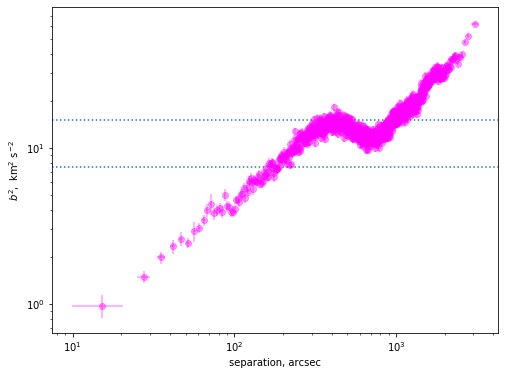

In [142]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4, color="magenta")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [ ]:
#NII emission line

In [40]:
df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df['RV[NII]6584'], '_key': 1}
)


df1.describe()

,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-3.934894,1.0
std,0.164268,0.105422,3.240030,0.0
min,270.544500,-24.566860,-11.440000,1.0
25%,271.010500,-24.406500,-5.950000,1.0
50%,271.110600,-24.344670,-3.950000,1.0
75%,271.211600,-24.256500,-1.900000,1.0
max,271.606600,-24.054330,8.010000,1.0


In [41]:
df2 = df1.copy()

In [42]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -3.32  271.0562 -24.10769 -3.32
  1  271.0562 -24.10769 -3.32  271.0348 -24.18544 -5.89
  2  271.0562 -24.10769 -3.32  271.0433 -24.22119  2.03
  3  271.0562 -24.10769 -3.32  271.1592 -24.23067 -4.93
  4  271.0562 -24.10769 -3.32  271.1480 -24.11269 -4.48

In [43]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

In [71]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]



In [72]:
pairs.head()



RA        DE     V       RA_       DE_    V_      dDE         dRA  \
0 1   271.0562 -24.10769 -2.19  271.0348 -24.18544 -3.58  279.900   70.299156   
  2   271.0562 -24.10769 -2.19  271.0433 -24.22119  2.84  408.600   42.370665   
  16  271.0562 -24.10769 -2.19  270.9704 -24.33131  1.59  805.032  281.692552   
  17  271.0562 -24.10769 -2.19  271.0009 -24.28103  6.85  624.024  181.592905   
  18  271.0562 -24.10769 -2.19  270.9405 -24.30600 -2.19  713.916  379.895870   

               s     log_s    dV      dV2   log_dV2  VV_mean s_class  
0 1   288.593107  2.460286  1.39   1.9321  0.286030   -2.885       5  
  2   410.790985  2.613621 -5.03  25.3009  1.403136    0.325       5  
  16  852.893437  2.930895 -3.78  14.2884  1.154984   -0.300       6  
  17  649.909175  2.812853 -9.04  81.7216  1.912337    2.330       6  
  18  808.700765  2.907788  0.00   0.0000      -inf   -2.190       6

In [73]:
pairs.describe()


,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,3.535290e+05,353529.000000
mean,271.216232,-24.271510,-2.671022,271.037176,-24.393673,-3.247067,439.786929,587.380240,806.749818,2.826790,0.576045,20.160767,-inf,-2.959045
std,0.135293,0.091345,2.900745,0.124940,0.083749,3.580847,321.957036,457.630555,447.955980,0.291108,4.452976,27.439392,NaN,2.379316
min,270.549500,-24.565560,-12.480000,270.544500,-24.566860,-12.480000,0.072000,0.327562,1.900494,0.278866,-18.130000,0.000000,-inf,-12.140000
25%,271.121100,-24.342220,-4.480000,270.965000,-24.445610,-6.020000,176.184000,230.741807,473.240329,2.675082,-2.380000,2.190400,3.405234e-01,-4.670000
50%,271.208200,-24.273560,-2.820000,271.038300,-24.392530,-3.350000,378.612000,487.709394,746.096234,2.872795,0.750000,9.734400,9.883092e-01,-3.020000
75%,271.296500,-24.196610,-1.030000,271.117400,-24.345530,-0.950000,644.508000,840.539280,1067.359168,3.028311,3.690000,27.144100,1.433675e+00,-1.370000
max,271.606600,-24.054330,10.120000,271.577800,-24.063610,10.120000,1819.980000,3454.002676,3461.323373,3.539242,19.200000,368.640000,2.566602e+00,9.070000


In [74]:

pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.174242,0.290836,0.427712,0.075379,-0.038686,0.107379,0.586876,0.527546,0.467031,0.220565,0.037758,0.041874,0.148175
DE,0.174242,1.000000,0.229370,0.024728,0.481016,0.077765,0.570938,0.147525,0.403255,0.399793,0.086880,-0.028136,-0.003496,0.198336
V,0.290836,0.229370,1.000000,0.045518,0.092525,0.067766,0.147630,0.241442,0.285485,0.240606,0.596923,0.152799,0.120455,0.660569
RA_,0.427712,0.024728,0.045518,1.000000,-0.025089,-0.084544,0.048751,-0.480865,-0.388696,-0.317500,0.097636,-0.092059,-0.061106,-0.035872
DE_,0.075379,0.481016,0.092525,-0.025089,1.000000,0.207604,-0.445144,0.096276,-0.123775,-0.150053,-0.106672,-0.006915,-0.005876,0.212622
V_,-0.038686,0.077765,0.067766,-0.084544,0.207604,1.000000,-0.114981,0.038298,-0.028291,-0.016956,-0.760003,0.051184,-0.006718,0.793804
dDE,0.107379,0.570938,0.147630,0.048751,-0.445144,-0.114981,1.000000,0.060522,0.527786,0.548859,0.188631,-0.022262,0.001932,0.003469
dRA,0.586876,0.147525,0.241442,-0.480865,0.096276,0.038298,0.060522,1.000000,0.859923,0.737402,0.126483,0.119081,0.095346,0.175996
s,0.527546,0.403255,0.285485,-0.388696,-0.123775,-0.028291,0.527786,0.859923,1.000000,0.906709,0.208720,0.090883,0.079515,0.152736
log_s,0.467031,0.399793,0.240606,-0.317500,-0.150053,-0.016956,0.548859,0.737402,0.906709,1.000000,0.170370,0.100820,0.108660,0.133908


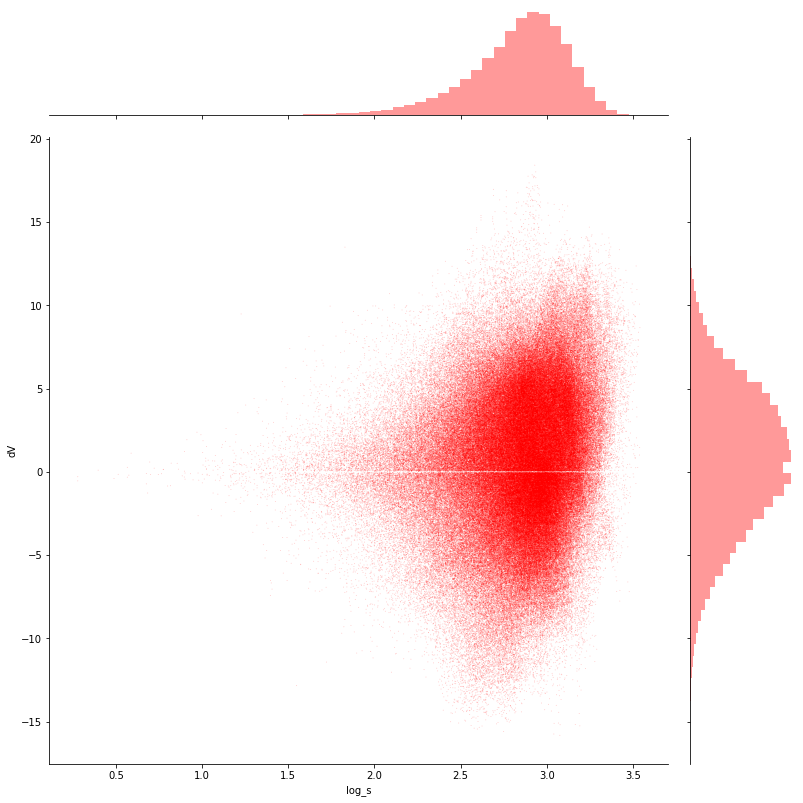

In [45]:

mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="red")
ax.fig.set_size_inches(12, 12)

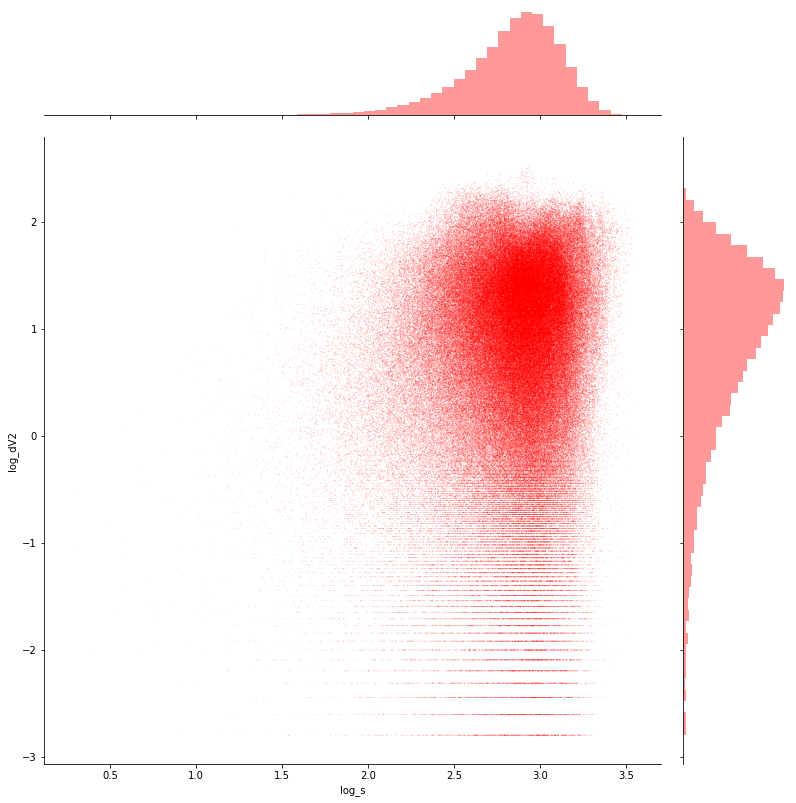

In [46]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none', color="red")
ax.fig.set_size_inches(12, 12)

In [47]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [48]:
pairs.s_class[pairs.s_class == 0] = 1

In [49]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  17.000000  17.000000
mean    0.272176   0.574487
std     0.464016   0.144444
min     0.000100   0.278866
25%     0.025600   0.513640
50%     0.072900   0.588373
75%     0.291600   0.684262
max     1.612900   0.746366

s_class = 2
              dV2       log_s
count  133.000000  133.000000
mean     1.712326    1.101771
std      7.920687    0.124207
min      0.000000    0.764528
25%      0.048400    1.025487
50%      0.270400    1.137724
75%      0.960400    1.196895
max     89.870400    1.247424

s_class = 3
               dV2        log_s
count  1448.000000  1448.000000
mean      4.611252     1.595528
std      10.437718     0.122404
min       0.000000     1.251207
25%       0.168100     1.515272
50%       1.020100     1.624635
75%       4.010025     1.694547
max     

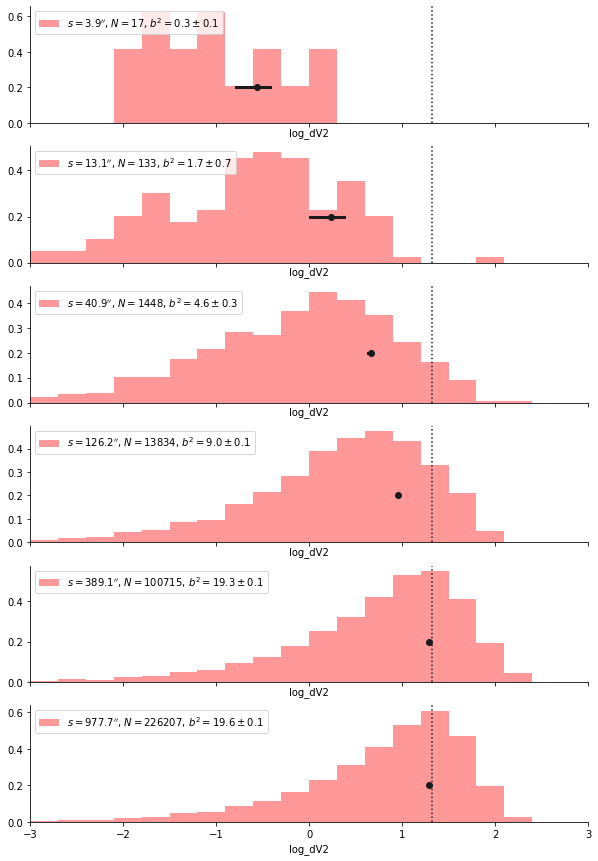

In [50]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="red", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [51]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 20.98


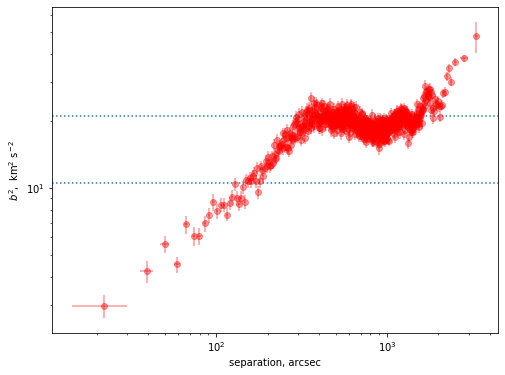

In [53]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4, color="red")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [54]:
df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df['RV[SII]6731'], '_key': 1}
)


df1.describe()

,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-2.989252,1.0
std,0.164268,0.105422,3.328345,0.0
min,270.544500,-24.566860,-12.480000,1.0
25%,271.010500,-24.406500,-5.260000,1.0
50%,271.110600,-24.344670,-2.980000,1.0
75%,271.211600,-24.256500,-0.960000,1.0
max,271.606600,-24.054330,10.120000,1.0


In [55]:
df2 = df1.copy()

In [56]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -2.19  271.0562 -24.10769 -2.19
  1  271.0562 -24.10769 -2.19  271.0348 -24.18544 -3.58
  2  271.0562 -24.10769 -2.19  271.0433 -24.22119  2.84
  3  271.0562 -24.10769 -2.19  271.1592 -24.23067 -4.06
  4  271.0562 -24.10769 -2.19  271.1480 -24.11269 -4.14

In [57]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

In [67]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]


In [68]:
pairs.head()


RA        DE     V       RA_       DE_    V_      dDE         dRA  \
0 1   271.0562 -24.10769 -2.19  271.0348 -24.18544 -3.58  279.900   70.299156   
  2   271.0562 -24.10769 -2.19  271.0433 -24.22119  2.84  408.600   42.370665   
  16  271.0562 -24.10769 -2.19  270.9704 -24.33131  1.59  805.032  281.692552   
  17  271.0562 -24.10769 -2.19  271.0009 -24.28103  6.85  624.024  181.592905   
  18  271.0562 -24.10769 -2.19  270.9405 -24.30600 -2.19  713.916  379.895870   

               s     log_s    dV      dV2   log_dV2  VV_mean s_class  
0 1   288.593107  2.460286  1.39   1.9321  0.286030   -2.885       5  
  2   410.790985  2.613621 -5.03  25.3009  1.403136    0.325       5  
  16  852.893437  2.930895 -3.78  14.2884  1.154984   -0.300       6  
  17  649.909175  2.812853 -9.04  81.7216  1.912337    2.330       6  
  18  808.700765  2.907788  0.00   0.0000      -inf   -2.190       6

In [69]:

pairs.describe()



,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,353529.000000,3.535290e+05,353529.000000
mean,271.216232,-24.271510,-2.671022,271.037176,-24.393673,-3.247067,439.786929,587.380240,806.749818,2.826790,0.576045,20.160767,-inf,-2.959045
std,0.135293,0.091345,2.900745,0.124940,0.083749,3.580847,321.957036,457.630555,447.955980,0.291108,4.452976,27.439392,NaN,2.379316
min,270.549500,-24.565560,-12.480000,270.544500,-24.566860,-12.480000,0.072000,0.327562,1.900494,0.278866,-18.130000,0.000000,-inf,-12.140000
25%,271.121100,-24.342220,-4.480000,270.965000,-24.445610,-6.020000,176.184000,230.741807,473.240329,2.675082,-2.380000,2.190400,3.405234e-01,-4.670000
50%,271.208200,-24.273560,-2.820000,271.038300,-24.392530,-3.350000,378.612000,487.709394,746.096234,2.872795,0.750000,9.734400,9.883092e-01,-3.020000
75%,271.296500,-24.196610,-1.030000,271.117400,-24.345530,-0.950000,644.508000,840.539280,1067.359168,3.028311,3.690000,27.144100,1.433675e+00,-1.370000
max,271.606600,-24.054330,10.120000,271.577800,-24.063610,10.120000,1819.980000,3454.002676,3461.323373,3.539242,19.200000,368.640000,2.566602e+00,9.070000


In [70]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.174242,0.290836,0.427712,0.075379,-0.038686,0.107379,0.586876,0.527546,0.467031,0.220565,0.037758,0.041874,0.148175
DE,0.174242,1.000000,0.229370,0.024728,0.481016,0.077765,0.570938,0.147525,0.403255,0.399793,0.086880,-0.028136,-0.003496,0.198336
V,0.290836,0.229370,1.000000,0.045518,0.092525,0.067766,0.147630,0.241442,0.285485,0.240606,0.596923,0.152799,0.120455,0.660569
RA_,0.427712,0.024728,0.045518,1.000000,-0.025089,-0.084544,0.048751,-0.480865,-0.388696,-0.317500,0.097636,-0.092059,-0.061106,-0.035872
DE_,0.075379,0.481016,0.092525,-0.025089,1.000000,0.207604,-0.445144,0.096276,-0.123775,-0.150053,-0.106672,-0.006915,-0.005876,0.212622
V_,-0.038686,0.077765,0.067766,-0.084544,0.207604,1.000000,-0.114981,0.038298,-0.028291,-0.016956,-0.760003,0.051184,-0.006718,0.793804
dDE,0.107379,0.570938,0.147630,0.048751,-0.445144,-0.114981,1.000000,0.060522,0.527786,0.548859,0.188631,-0.022262,0.001932,0.003469
dRA,0.586876,0.147525,0.241442,-0.480865,0.096276,0.038298,0.060522,1.000000,0.859923,0.737402,0.126483,0.119081,0.095346,0.175996
s,0.527546,0.403255,0.285485,-0.388696,-0.123775,-0.028291,0.527786,0.859923,1.000000,0.906709,0.208720,0.090883,0.079515,0.152736
log_s,0.467031,0.399793,0.240606,-0.317500,-0.150053,-0.016956,0.548859,0.737402,0.906709,1.000000,0.170370,0.100820,0.108660,0.133908


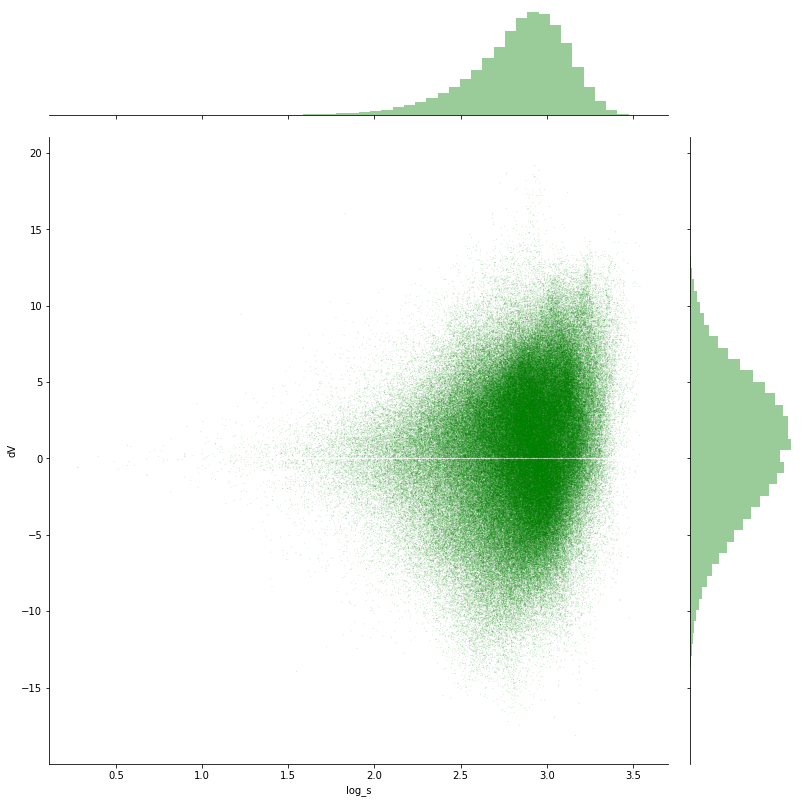

In [59]:

mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="green")
ax.fig.set_size_inches(12, 12)

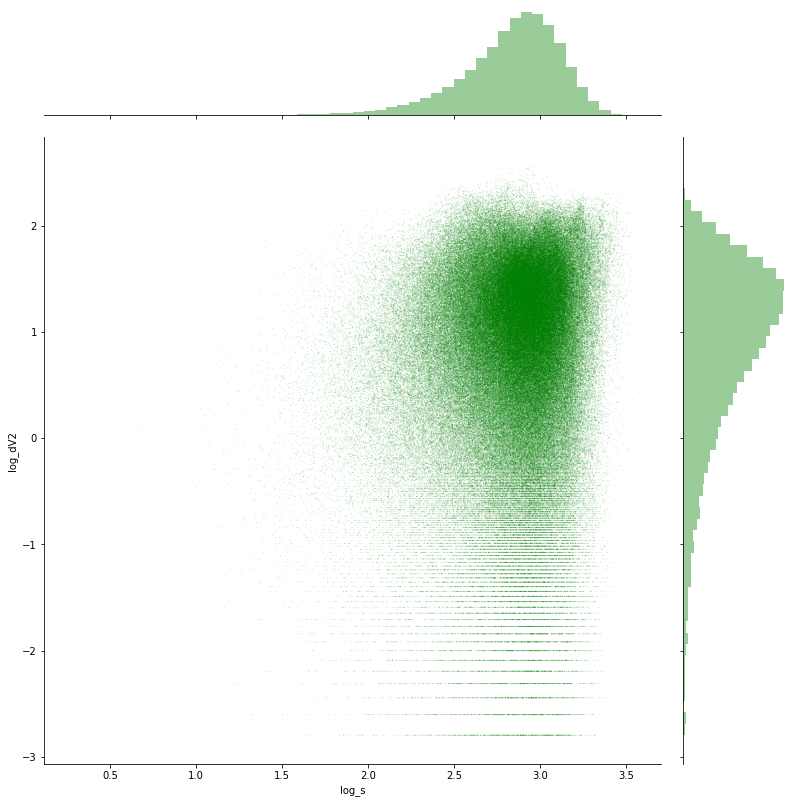

In [60]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none', color="green")
ax.fig.set_size_inches(12, 12)

In [61]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [62]:
pairs.s_class[pairs.s_class == 0] = 1

In [63]:

for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  17.000000  17.000000
mean    0.348776   0.574487
std     0.381759   0.144444
min     0.000100   0.278866
25%     0.044100   0.513640
50%     0.220900   0.588373
75%     0.504100   0.684262
max     1.210000   0.746366

s_class = 2
              dV2       log_s
count  133.000000  133.000000
mean     2.170917    1.101771
std      7.915850    0.124207
min      0.000000    0.764528
25%      0.048400    1.025487
50%      0.518400    1.137724
75%      1.904400    1.196895
max     88.736400    1.247424

s_class = 3
               dV2        log_s
count  1448.000000  1448.000000
mean      5.160422     1.595528
std      11.491438     0.122404
min       0.000000     1.251207
25%       0.230400     1.515272
50%       1.299600     1.624635
75%       4.840000     1.694547
max     

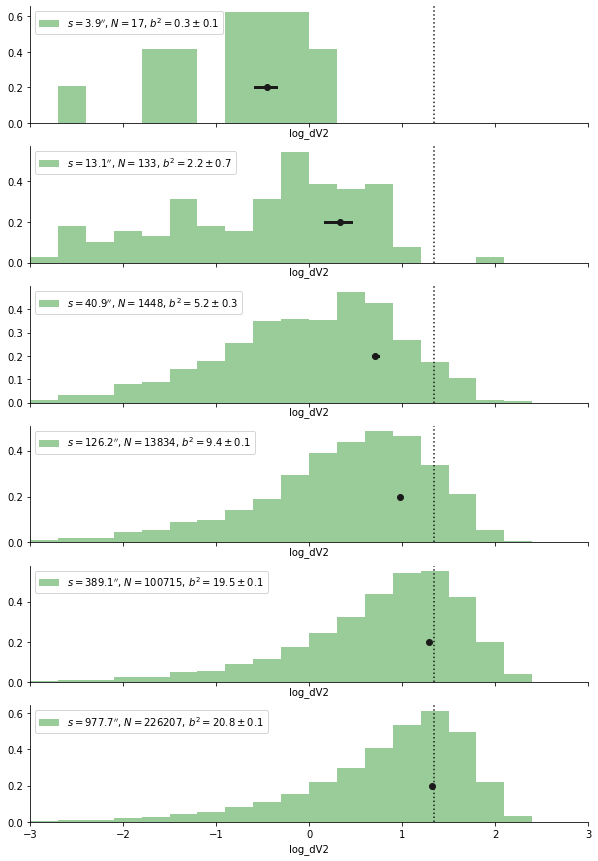

In [64]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, color="green",hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [65]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 22.14


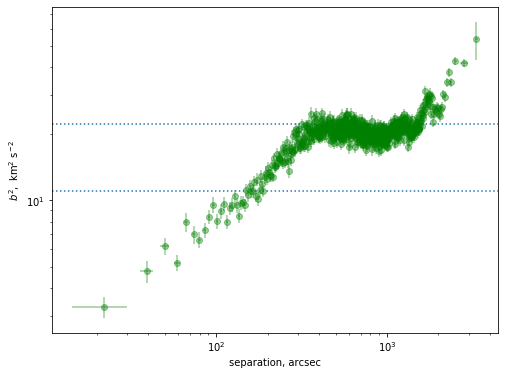

In [66]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4, color="green")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None